In [1]:
# set this to your working directory
WORKING_DIR = '/home/elliott/Dropbox/_Ash_Teaching/2018-09 - Bocconi - Text Data and ML/code'
import os
os.chdir(WORKING_DIR) # set working directory 


In [3]:
# Pandas Data-frames

# open dataset
import pandas as pd
df1 = pd.read_csv('death-penalty-cases.csv')
df1.head() # show top few lines of data

,Unnamed: 0,author_id,caseName,citeCount,cluster_id,court_id,dateFiled,snippet,state,year
0,0,NaN,In Re Waiver of Death Penalty,8,1923143,nj,1965-09-14T00:00:00Z,N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PE...,NJ,1965
1,1,4019.0,State v. Dixon,552,1876220,fla,1973-07-26T00:00:00Z,"whether the death penalty is, per se, unconsti...",FL,1973
2,2,5765.0,Jurek v. State,143,2450978,texcrimapp,1975-04-16T00:00:00Z,# ;s contention that the assessment of the dea...,TX,1975
3,3,NaN,In the Matter of Death Penalty Sentencing,0,891563,nm,2009-11-30T00:00:00Z,. d ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...,NM,2009
4,4,5758.0,Ex Parte Traxler,56,4162563,texcrimapp,1944-12-20T00:00:00Z,assume the district attorney orally waived the...,TX,1944


In [4]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 10 columns):
Unnamed: 0    32567 non-null int64
author_id     18215 non-null float64
caseName      32567 non-null object
citeCount     32567 non-null int64
cluster_id    32567 non-null int64
court_id      32567 non-null object
dateFiled     32567 non-null object
snippet       32567 non-null object
state         32567 non-null object
year          32567 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 2.5+ MB


In [5]:
df1['court_id'].value_counts()

texapp             2577
texcrimapp         2380
fla                1927
cal                1310
ga                 1104
illappct           1077
pa                  930
miss                925
ill                 895
oklacrimapp         760
nc                  731
tenncrimapp         723
calctapp            723
alacrimapp          711
ohioctapp           611
ariz                552
wva                 545
ind                 515
la                  512
mo                  507
ark                 459
nysd                390
ala                 379
tenn                368
fladistctapp        359
nyed                325
sc                  323
nev                 294
pasuperct           291
wash                272
                   ... 
iasd                  7
akd                   6
lamd                  6
wyd                   6
connsuperct           6
vid                   5
oked                  5
oklaag                5
wiwd                  4
ilsd                  4
arkag           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52a7110198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f52a70f93c8>]], dtype=object)

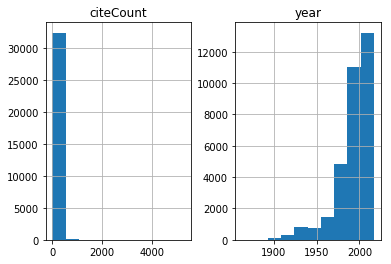

In [6]:
df1[['year','citeCount']].hist()


In [7]:
###################################
# Iterating over documents in a dataframe
###################################

from utils import process_document

processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df1.iterrows():
    docid = row['cluster_id'] # get document identifier
    text = row['snippet']     # get text snippet
    document = process_document(text) # get sentences/tokens
    processed[docid] = document # add to dictionary    

In [8]:
###################################
# Iterating over documents in text files
###################################

# select all files in your directory
from glob import glob
fnames = glob('contracts/*txt') # selects files using wildcards

# iterate over files
for fname in fnames:
    docid = fname.split('/')[-1][:-4] # get docid from filename
    text = open(fname).read() # read file as string
    document = process_document(text) # get sentences/tokens
    processed[docid] = document # add to dictionary
    

In [9]:
###################################
# Saving data in python
###################################

# save as python pickle
pd.to_pickle(processed, 'processed_corpus.pkl')
